### PART A

In [48]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('BrentOilPrices.csv')

# cleaning the dataset
dataset = dataset.dropna()
dataset.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 211.2+ KB


In [50]:
dataset.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


a) Data Visualisation: Define simple line chart to give an idea of the stock
price change Brent oil price information for the last 20 years

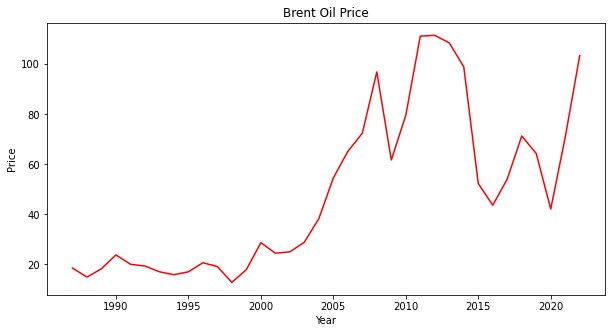

In [51]:
# grouping the data by 5 years
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year

# Visualising the dataset
dataset.groupby('Year')['Price'].mean().plot(kind='line', figsize=(10, 5), color='red')
plt.title('Brent Oil Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()


b). Build explanatory variables — the features we are going to use to predict
the price of oil. The variables we will be using at this stage, are the moving
averages for the past three (MA3) and nine days (MA9), based on input
from the oil stock market.



In [52]:
# Create the simple moving average with a 3 day window
dataset['MA3'] = dataset['Price'].rolling(window=3).mean()
# Create the simple moving average with a 9 day window
dataset['MA9'] = dataset['Price'].rolling(window=9).mean()
# Create the simple moving average with a 21 day window
dataset['MA21'] = dataset['Price'].rolling(window=21).mean()
# Create the simple moving average with a 50 day window
dataset['MA50'] = dataset['Price'].rolling(window=50).mean()
# Create the simple moving average with a 200 day window
dataset['MA200'] = dataset['Price'].rolling(window=200).mean()

c) Define the Train and Test Data: This step covers the preparation of the train
data and the test data.

In [53]:

# split the dataset into training and test set of the entire dataset

# drop the null values
dataset = dataset.dropna()
# split the dataset into training and test set
train = dataset[:int(0.8*(len(dataset)))]
test = dataset[int(0.8*(len(dataset))):]


d) Build a Linear Regression Model (LR) using the moving averages for the
past three (MA3) and nine days (MA9) as inputs;

In [54]:
#Build a Linear Regression Model (LR) using the moving average for the past three (MA3) and nine days (MA9) as inputs

# Importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the feature set
X_train = train[['MA3', 'MA9']]
y_train = train['Price']
X_test = test[['MA3', 'MA9']]
y_test = test['Price']

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

e) Prediction Function and Result: In this step, run the model using the test data
we defined in step four. Visualise the predicted versus the actual stock values
for the specific time period and calculate the model’s accuracy

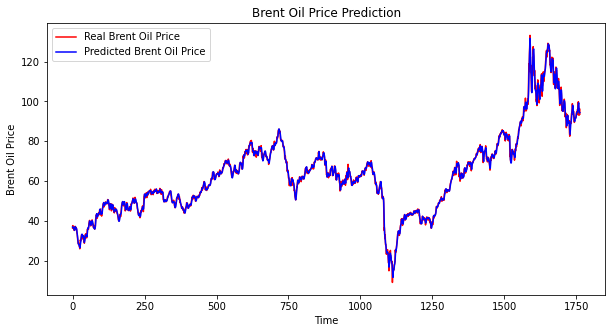

In [55]:

"""
Prediction Function and Result: In this step, run the model using the test data we defined in step four. Visualise the predicted versus the actual stock values for the specific time period and calculate the model’s accuracy
"""

# Predict the price of Brent oil
y_pred = model.predict(X_test)

# Visualising the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, color='red', label='Real Brent Oil Price')
plt.plot(y_pred, color='blue', label='Predicted Brent Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Brent Oil Price')
plt.legend()
plt.show()


f) Calculate the alpha and betas value: Define the linear regression equation using the
alpha and betas values

In [56]:
# Calculate the alpha and betas value
alpha = model.intercept_
betas = model.coef_
print('alpha = ', alpha)
print('betas = ', betas)



alpha =  0.01668524934777338
betas =  [ 1.21633965 -0.21668419]


In [57]:
# accuracy of the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))




Mean squared error: 1.49
Coefficient of determination: 1.00


### PART B

In [58]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [61]:
# Importing dataset
dataset = pd.read_csv('BrentOilPrices.csv')
dataset = dataset.dropna()
dataset = dataset.drop(['Date'], axis=1)

a. Define the Train and Test Data: This step covers the preparation of the train data
and the test data. Explain the techniques used to generate the train data and the test
data for the given Brent oil price time series data set.

In [62]:
# Splitting the dataset into the Training set and Test set
training_set = dataset.iloc[:int(dataset.shape[0]*0.8), 0:1].values
test_set = dataset.iloc[int(dataset.shape[0]*0.8):, 0:1].values


In [63]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


b. Build the Model: Define the Long Short-Term Memory model (LSTM) and clearly
explain the input features as a function of time lag.

In [64]:

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
224/224 [==============================] - 41s 110ms/step - loss: 0.0051
Epoch 2/100
224/224 [==============================] - 25s 111ms/step - loss: 0.0020
Epoch 3/100
224/224 [==============================] - 27s 119ms/step - loss: 0.0016
Epoch 4/100
224/224 [==============================] - 26s 116ms/step - loss: 0.0015
Epoch 5/100
224/224 [==============================] - 24s 109ms/step - loss: 0.0014
Epoch 6/100
224/224 [==============================] - 24s 109ms/step - loss: 0.0013
Epoch 7/100
224/224 [==============================] - 25s 109ms/step - loss: 0.0013
Epoch 8/100
224/224 [==============================] - 24s 109ms/step - loss: 0.0011
Epoch 9/100
224/224 [==============================] - 25s 110ms/step - loss: 0.0010
Epoch 10/100
224/224 [==============================] - 25s 111ms/step - loss: 0.0010
Epoch 11/100
224/224 [==============================] - 25s 111ms/step - loss: 0.0010
Epoch 12/100
224/224 [==============================] - 25s 111

c. Prediction Function and Result: In this step, we are running the model using the test
data we defined in step four. Visualise the predicted versus the actual oil price values
for the reported time period

In [65]:


# Prediction Function and Result: In this step, we are running the model using the test data we defined in step four. Visualise the predicted versus the actual oil price values for the reported time period.

# Getting the real stock price of 2017
dataset_total = pd.concat((dataset['Price'][:int(dataset.shape[0]*0.8)], dataset['Price'][int(dataset.shape[0]*0.8):]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# Creating a data structure with 60 timesteps and 1 output
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



57/57 [==============================] - 5s 31ms/step


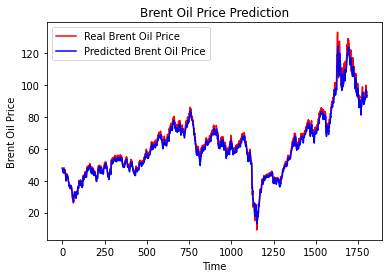

In [66]:

# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Brent Oil Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Brent Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Brent Oil Price')
plt.legend()
plt.show()


In [67]:
# print the predicted and actual values
print('Predicted Brent Oil Price: ', predicted_stock_price)
print('Actual Brent Oil Price: ', test_set)

Predicted Brent Oil Price:  [[47.932053]
 [47.05733 ]
 [46.250183]
 ...
 [92.326546]
 [92.23547 ]
 [93.36125 ]]
Actual Brent Oil Price:  [[47.51]
 [46.93]
 [46.72]
 ...
 [94.25]
 [96.37]
 [93.59]]


In [68]:

# Mean Squared Error
mse = mean_squared_error(test_set, predicted_stock_price)
print('Mean Squared Error: ', mse)


Mean Squared Error:  6.0097600720024005


In [69]:

# Root Mean Squared Error
rmse = math.sqrt(mse)
print('Root Mean Squared Error: ', rmse)


Root Mean Squared Error:  2.4514811996020693


In [70]:

# print accuracy
accuracy = 100 - (rmse / test_set.mean()) * 100
print('Accuracy: ', accuracy)


Accuracy:  96.09743735013829
